# CQF EXAM N2 SOLUTION


Summary Table

| CQF Candidate   |
| ----------- |
| Alan Rodriguez |
| June 2023 Cohort |

In [1]:
from IPython.display import display, HTML

### Table Contents <a id="table_contents"></a>

- [Question](#question)
- [1. Introduction](#introduction)
    - [1.1 Packages](#packages)
- [2. Asian Options](#asian_options)
    - [2.1 Asian Options Definition](#asian_option_definition)
    - [2.2 Discrete and Continuous examples](#asian_option_examples)
    - [2.3 Asian Call Option](#asian_call_option)
    - [2.4 Asian Put Option](#asian_put_option)
- [3. Lookback Options](#lookback_options)
    - [3.1 Lookback Options Definition](#lookback_option_definition)
    - [3.2 Lookback Options examples](#lookback_option_example)
    - [3.3 Lookback Call Option](#lookback_call_options)
    - [3.4 Lookback Put Option](#lookback_put_options)
- [4. Euler-Maruyama Schemes](#euler)
    - [4.1 Euler-Maruyama Definition](#euler_definition)
- [5. Simulationand Analysis](#simulation_analysis)
    - [5.1 Simulation](#simulation)
        - [5.1.1 Simulation Spot](#simulation_spot)
        - [5.1.2 Simulation Strike](#simulation_strike)
        - [5.1.3 Simulation Volatility](#simulation_volatility)
        - [5.1.4 Simulation Time to maturity](#simulation_time)
        - [5.1.5 Simulation Risk free rate](#simulation_rate)
    - [5.2 Analysis and interesting observations](#analysis)
    - [5.3 Convergence](#convergence)
    - [5.4 Antithetic](#antithetic)
- [6. Conclusion](#conclusion)
- [7. References](#references)


**Content:**

First, I begin with an introduction to exotic options, and import the python packages for the rest of the notebook. As an example, I generate a Montecarlo Simulation for stock prices [(1. Introduction)](#introduction). 
The we explain Asian options by providing concept definition and examples. We compare both Discrete and Continuous methods  following arithmetic and geometrics  averages using graphs and comparison tables.  [(2. Asian Options)](#asian_options)
For Lookback options, we follow a similar analysis for Discrete and Continuous maximum Methods[(3. Lookback Options)](#lookback_options) 
After that, we return to Numerical Method Euler Maruyama EM  [(4. Euler-Maruyama Schemes)](#euler)
After explaining the EM method, we develop a simulation to understand the effect in the change of the variables  [(5. Simulation and Analysis)](#simulation_analysis) For each simulation we gather the main observations by identifying the effect of the variable in the option's value (price).
Consequently, we compare the results and discuss the findings. [(5.2 Analysis and interesting observations)](#analysis) 
As a result, we reach the conclusions based on the result of the simulation and the observations made.[(6. Conclusions)](#conclusion)
At the end, we have the References of the work [(7. References)](#references)


### Assignment for Module 3 [Summer 2023] Exam N2 
### Question <a id="question"></a>

Use the expected value of the discounted payoff under the risk-neutral density ${\mathbb{Q}}$:

$$V(S,t) = e^{-r.(T-t)}.\mathbb{E}^{\mathbb{Q}}[\textbf{Payoff}(S_T)]$$

for the appropriate form of payoff, to consider **Asian** and **Lookback** options.

Use the **Euler-Maruyama** (only) scheme for initially simulating the underlying stock price. As an initial example you may use the following set of sample data:

Today's stock price $S_0 = 100$

Strike $E = 100$

Time to expiry $(T - t) = 1 year$

Volatility $\sigma = 20$%

Constant risk-free interest rate $r = 5$%

Then vary the data to see the effect on the option price.

Report should include: 
Outline of the financial problem and numerical procedure used
Results - appropriate tables and comparisons
Any interesting observations 

### 1. Introduction <a id="introduction"></a>

**Exotic Options**  are complex financial products characterized by non-standard terms that can have customized structures to meet specific investment objectives. Exotic options are traded over-the-counter (OTC). Exotic option pricing is model-dependent due to its complex structure. 

- Important features of exotic options are (1) time dependence, (2) cash flows (discrete and continuous), (3)path dependence (payoff depends on the history of the asset price), (4) dimensionality (number of underlying independent variables )  and (5) Order (first order or compound options)





### 1.1 Packages <a id="packages"></a>
Install all necessary libraries

In [2]:
print("Importing Packages") 
import pandas as pd
import numpy as np
from numpy import *
import scipy.stats as stats0
from scipy.stats import norm as norm0
import math as math0
from tabulate import tabulate  
import sympy as sp
import scipy.stats as si
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importing Packages


### Simulation of  stock prices using Monte Carlo method

The Monte Carlo method is a computational algorithm that generates random numbers. Monte Carlo methods are proved to be a very valuable and flexible computational tool. Monte Carlo methods are  used in high dimensional problems such as pricing exotics options.

The pricing of an Exotic Option relies on the simulation method used. In this case we will use the Euler-Maruyama numerical method for simulating the underlying stock price. In the section 4 we go into more detials about  Euler-Maruyama numerical method. [(4. Euler-Maruyama Schemes)](#euler)

Euler-Maruyama Scheme:
$$S_{t+\delta t}\sim S_t(1+r\delta t+\sigma\phi\sqrt{\delta t})$$


Based on the Monte Carlo Simulation we can simulate the stock price following a Black-Scholes-Merton under risk neutrality, geometric Brownian motion with a stochastic differential equation (SDE), given as:

$$dS_t = rS_t dt + \sigma S_t dZ_t$$

where $S_t$ is the price of the underlying at time $t$, $\sigma$ is constant volatility, $r$ is the constant risk-free interest rate and $Z$ is the Brownian motion.



### Defining Initial Parameters

In [3]:
print("Definining the initial simulation variables:")
print("*Stock price")
S_o= 100
S0=S_o
print(">> Stock price = "+str(S_o))
print("*strike price")
k=100
e=k
K=k
strike_e=e
print("strike price = "+str(k))
print("*time to expiration")
T=1
time_expiration = T
print(">> time to expiration = "+str(T))
print("*volatility")
sigma=0.2
vol=sigma
print(">> volatility "+str(sigma))
print("*risk free rate")
r=0.05
riskfree=r
print(">> risk free rate = "+str(r))
days=252
days_year=days
discrete_period = 20
t_days=days
index_0=0
numb_steps= 252*10
Nsteps=numb_steps
numb_simulations=99
em_simulations=999
example_paths=10
sims=numb_simulations
number_of_simulations=1000
random_seed_n=20230926
print("random seed number = "+str(random_seed_n))



Definining the initial simulation variables:
*Stock price
>> Stock price = 100
*strike price
strike price = 100
*time to expiration
>> time to expiration = 1
*volatility
>> volatility 0.2
*risk free rate
>> risk free rate = 0.05
random seed number = 20230926


### Defining Montecarlo Simulation Function

Defining Montecarlo Simulation

Generating the stock price path simulation example

Plotting simulated price paths


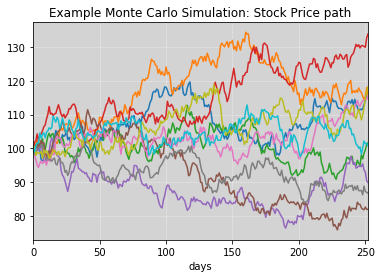

In [4]:
print("Defining Montecarlo Simulation")
def monte_carlo_simulation(spot_zero, rf_average, vol_sigma, time_horizon, time_steps, number_simimulations):
    random.seed(random_seed_n) 
    s = spot_zero
    r = rf_average
    T = time_horizon
    t = time_steps
    n = number_simimulations
    dt = T/t
    S = zeros((t + 1, n))
    S[0] = s
    for i in range(1, t + 1):
        z = random.standard_normal(n)
        S[i] = S[i - 1] * exp((r - 0.5 * vol_sigma ** 2) * dt + vol_sigma * sqrt(dt) * z)  
    return S
print()
print("Generating the stock price path simulation example")
stock_price_simulation = monte_carlo_simulation(S_o, r, sigma, T, t_days, numb_simulations)
stock_price_path = pd.DataFrame(stock_price_simulation)    
print()
print("Plotting simulated price paths")
for index in range(0, example_paths, 1):
    plt.plot(stock_price_path[index])
    plt.grid(True)
    plt.xlabel('days')
    plt.xlim(0,days_year)
    plt.title('Example Monte Carlo Simulation: Stock Price path')
    plt.gca().set_facecolor('lightgray')
    plt.grid(color='white', linestyle='--', linewidth=0.5, alpha=0.7); 
plt.show()
plt.close();

### 2. Asian Options <a id="asian_options"></a>

   - [2.1 Asian Options Definition](#asian_option_definition)
   - [2.2 Discrete and Continuous examples](#asian_option_examples)
   - [2.3 Asian Call Option](#asian_call_option)
   - [2.4 Asian Put Option](#asian_put_option)   
   - [3. Lookback option](#lookback_options)
   - [Top](#table_contents)   


### 2.1 Asian Option Definition <a id="asian_option_definition"></a>

An Asian option derives its value from the average price of the underlying asset over a specific period of time. 
Therefore, the price of an asian option depends on the path taken by the underlying asset (Strongly path dependant).
The average can be calculate by two methods: arithmetic mean or geometric mean; 
and it can happen over discrete or continuous time periods (time dependency).

The sensitive of the Asian option value to makret fluctiaciton will depends 
on the method used for averaging, impacting its price. This average of the underlying 
can significally reduce the price of an Asian option compared with a similar vanilla contract


- **Asian Call Option**: the holder has the right (but not the obligation) 
    to buy the underlying asset at a predetermined strike price. 
    The payout at expiration is determined by the difference between 
    the average price of the underlying asset over 
    the option's life and the strike price. 
    If this difference is positive, it represents a profit.

- **Asian Put Option**: In an Asian put option, the holder has the right (but not the obligation) 
    to sell the underlying asset at a predetermined strike price. 
    The payout at expiration is determined by the difference between 
    the strike price and the average price of the underlying asset. 
    If this difference is positive, it represents a profit    
   
    
 - **Average strike call**
$$max(S - A, 0)$$

 - **Average strike put**
$$max(A - S, 0)$$

 - **Average rate call**
$$max(A - E, 0)$$

 - **Average rate put**
$$max(E - A, 0)$$

where $S$ is the stock price and $E$ the strike.   


- [Top](#table_contents)  

### 2.2 Asian Option Discrete and Continuous examples <a id="asian_option_examples"></a>
### Continuous

In [5]:
print("Defining functions for continuous arithmetic and geometric averages")
def continuous_arithmetic_average(dictionary, dataframe):
        for col in dataframe.columns:
            vet = []
            for index in range(len(dataframe[col])):
                temp = index
                summ = 0
                while temp >= 0:
                    summ = summ + dataframe[col][temp]
                    temp = temp - 1
                vet.append(summ/(index + 1))
            dictionary[col] = vet      
        return dictionary
    
def continuous_geometric_average(dictionary, dataframe):
        for col in dataframe.columns:
            vet = []
            for index in range(len(dataframe[col])):
                temp = index
                mult = 1
                while temp >= 0:
                    mult = mult * (dataframe[col][temp] ** (1 / (index + 1)))
                    temp = temp - 1
                vet.append(mult)
            dictionary[col] = vet          
        return dictionary

Defining functions for continuous arithmetic and geometric averages


#### Asian Option Discrete and Continuous examples

Continuous Arithmetic Average


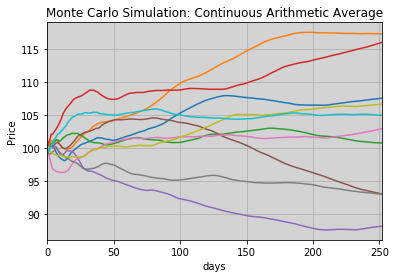

Countinuous Geometric Average


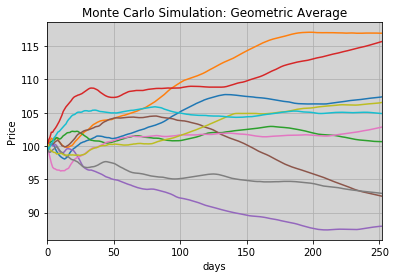

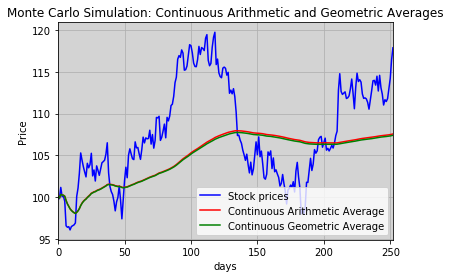

In [6]:
print("Continuous Arithmetic Average")
ArithmeticContinuous = {}
ArithmeticContinuous = continuous_arithmetic_average(ArithmeticContinuous, stock_price_path)
caa_0 = pd.DataFrame(ArithmeticContinuous)

for index in range(0, 10, 1):
    plt.plot(caa_0[index])
    plt.grid(True)
    plt.xlabel('days')
    plt.xlim(0,days_year)
    plt.ylabel('Price')
    plt.gca().set_facecolor('lightgray')
    plt.title('Monte Carlo Simulation: Continuous Arithmetic Average');
plt.show()    
    
print("Countinuous Geometric Average")
GeometricCountinuous = {}
GeometricCountinuous = continuous_geometric_average(GeometricCountinuous, stock_price_path)   
cga_0 = pd.DataFrame(GeometricCountinuous)

for index in range(0, 10, 1):
    plt.plot(cga_0[index])
    plt.grid(True)
    plt.xlabel('days')
    plt.xlim(0,days_year)
    plt.ylabel('Price')
    plt.gca().set_facecolor('lightgray')
    plt.title('Monte Carlo Simulation: Geometric Average');    
plt.show()

# Plot example - Continuous
plt.plot(stock_price_path[index_0], color = 'b', label = 'Stock prices')
plt.plot(caa_0[index_0], color = 'r', label = 'Continuous Arithmetic Average')
plt.plot(cga_0[index_0], color = 'g', label = 'Continuous Geometric Average')
plt.grid(True)
plt.xlabel('days')
plt.xlim(0,days_year)
plt.ylabel('Price')
plt.gca().set_facecolor('lightgray')
plt.title('Monte Carlo Simulation: Continuous Arithmetic and Geometric Averages')
plt.legend()
plt.show();

### Asian Option Discrete
#### Defining Functions

In [7]:
print("Defining functions for discrete arithmetic and geometric averages")
def discrete_arithmetic_average0(dictionary, dataframe, periods):
    for col in dataframe.columns:
        vet = []
        for index in range(len(dataframe[col])):
            temp = index
            summ = 0
            if index % periods == 0:
                control = index
                avg = 0
                for new_temp in range(index, (index + periods), 1):
                    if new_temp < len(dataframe[col]):
                        summ = summ + dataframe[col][new_temp]
                        avg = summ/(periods)
                    else:
                        avg = summ/(len(dataframe[col]) - control)
            vet.append(avg)
        dictionary[col] = vet
    return dictionary

def discrete_geometric_average0(dictionary, dataframe, periods):
    for col in dataframe.columns:
        vet = []
        for index in range(len(dataframe[col])):
            temp = index
            mult = 1
            if index % periods == 0:
                control = index
                for new_temp in range(index, (index + periods), 1):
                    avg = 0
                    if new_temp < len(dataframe[col]):
                        mult = mult * (dataframe[col][new_temp] ** (1 / (periods)))
                        avg = mult
                    else:
                        mult = 1
                        initial_range = len(dataframe[col])
                        final_range = control
                        for last_temps in range(initial_range, final_range, - 1):
                            if last_temps <= len(dataframe[col]):
                                mult = mult * ((dataframe[col][last_temps - 1]) ** (1 / (initial_range - final_range)))
                                avg = mult
            vet.append(avg)
        dictionary[col] = vet
    return dictionary

Defining functions for discrete arithmetic and geometric averages


### Asian Option Discrete Arithmetic and Geometric Average

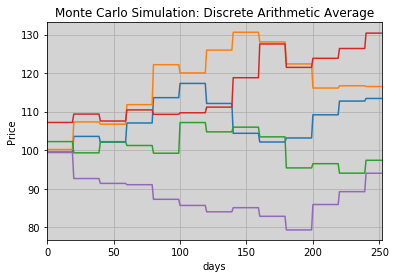

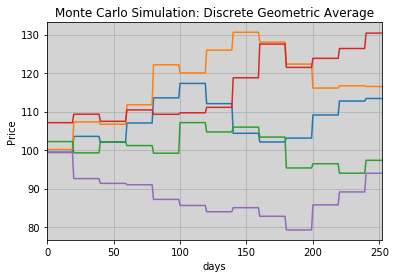

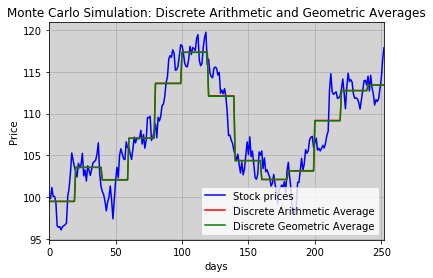

In [8]:
# Discrete Arithmetic Average
ArithmeticDiscrete = {}
ArithmeticDiscrete = discrete_arithmetic_average0(ArithmeticDiscrete, stock_price_path, discrete_period)
daa_0 = pd.DataFrame(ArithmeticDiscrete)

for index in range(0, 5, 1):
    plt.plot(daa_0[index])
    plt.grid(True)
    plt.xlabel('days')
    plt.xlim(0,days_year)
    plt.ylabel('Price')
    plt.gca().set_facecolor('lightgray')
    plt.title('Monte Carlo Simulation: Discrete Arithmetic Average');
plt.show();

# Discrete Geometric Average
GeometricDiscrete = {}
GeometricDiscrete = discrete_geometric_average0(GeometricDiscrete, stock_price_path, discrete_period)
dga_0 = pd.DataFrame(GeometricDiscrete)

for index in range(0, 5, 1):
    plt.plot(dga_0[index])
    plt.grid(True)
    plt.xlabel('days')
    plt.xlim(0,days_year)
    plt.ylabel('Price')
    plt.gca().set_facecolor('lightgray')
    plt.title('Monte Carlo Simulation: Discrete Geometric Average');
plt.show();

# Plot example - Discrete
plt.plot(stock_price_path[index_0], color = 'b', label = 'Stock prices')
plt.plot(daa_0[index_0], color = 'r', label = 'Discrete Arithmetic Average')
plt.plot(dga_0[index_0], color = 'g', label = 'Discrete Geometric Average')
plt.grid(True)
plt.xlabel('days')
plt.xlim(0,days_year)
plt.ylabel('Price')
plt.gca().set_facecolor('lightgray')
plt.title('Monte Carlo Simulation: Discrete Arithmetic and Geometric Averages')
plt.legend()
plt.show();

#### Asian Options: Comparison Discrete vs Continuous

Comparing both Discrete and Continuous

Continuous


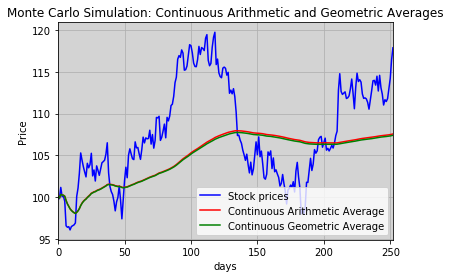

Discrete



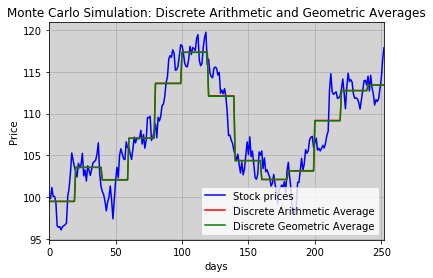

In [9]:
print("Comparing both Discrete and Continuous")
print()
print("Continuous")
plt.plot(stock_price_path[index_0], color = 'b', label = 'Stock prices')
plt.plot(caa_0[index_0], color = 'r', label = 'Continuous Arithmetic Average')
plt.plot(cga_0[index_0], color = 'g', label = 'Continuous Geometric Average')
plt.grid(True)
plt.xlabel('days')
plt.xlim(0,days_year)
plt.ylabel('Price')
plt.gca().set_facecolor('lightgray')
plt.title('Monte Carlo Simulation: Continuous Arithmetic and Geometric Averages')
plt.legend()
plt.show()
plt.close()

print("Discrete")
print()
plt.plot(stock_price_path[index_0], color = 'b', label = 'Stock prices')
plt.plot(daa_0[index_0], color = 'r', label = 'Discrete Arithmetic Average')
plt.plot(dga_0[index_0], color = 'g', label = 'Discrete Geometric Average')
plt.grid(True)
plt.xlabel('days')
plt.xlim(0,days_year)
plt.ylabel('Price')
plt.gca().set_facecolor('lightgray')
plt.title('Monte Carlo Simulation: Discrete Arithmetic and Geometric Averages')
plt.legend()
plt.show()
plt.close()

### 2.3 Asian Call Option <a id="asian_call_option"></a>
   - [Asian options](#asian_options)
   - [Top](#table_contents) 
   
**Asian Call Option**: the holder has the right (but not the obligation) 
    to buy the underlying asset at a predetermined strike price. 
    The payout at expiration is determined by the difference between 
    the average price of the underlying asset over 
    the option's life and the strike price. 
    If this difference is positive, it represents a profit.

#### Defining Functions

In [10]:
print("defining option payoff funcitons")
def option_payoff_mean(int_rate, time_exp, first_df, sec_df):
    value = (exp(- int_rate * time_exp) * mean(maximum(first_df - sec_df, 0))).mean()
    return value
def option_payoff(int_rate, time_exp, first_df, sec_df):
    value = exp(- int_rate * time_exp) * mean(maximum(first_df - sec_df, 0))
    return value

defining option payoff funcitons


#### Asian Call Continuous options payoffs

In [11]:
print("2.3 Asian Call Option")   
caasc = option_payoff_mean(r, T, stock_price_path, caa_0)
print(f'Asian Call Option Continuous Arithmetic Average Strike Call Value: {caasc:.2f}')
cgasc = option_payoff_mean(r, T, stock_price_path, cga_0)
print(f'Asian Call Option Continuous Geometric Average Strike Call Value: {cgasc:.2f}')
caarc = option_payoff_mean(r, T, caa_0, strike_e)
print(f'Asian Call Option Continuous Arithmetic Average Rate Call Value: {caarc:.2f}')
cgarc = option_payoff_mean(r, T, cga_0, strike_e)
print(f'Asian Call Option Continuous Geometric Average Rate Call Value: {cgarc:.2f}')
caascex = option_payoff(r, T, stock_price_path, caa_0)
cgascex = option_payoff(r, T, stock_price_path, cga_0)
caarcex = option_payoff(r, T, caa_0, strike_e)
cgarcex = option_payoff(r, T, cga_0, strike_e)

2.3 Asian Call Option
Asian Call Option Continuous Arithmetic Average Strike Call Value: 2.81
Asian Call Option Continuous Geometric Average Strike Call Value: 2.88
Asian Call Option Continuous Arithmetic Average Rate Call Value: 3.05
Asian Call Option Continuous Geometric Average Rate Call Value: 2.97


#### Asian Call Option Continuos Graphs

2.3 Asian Call Option  Continuos Graphs


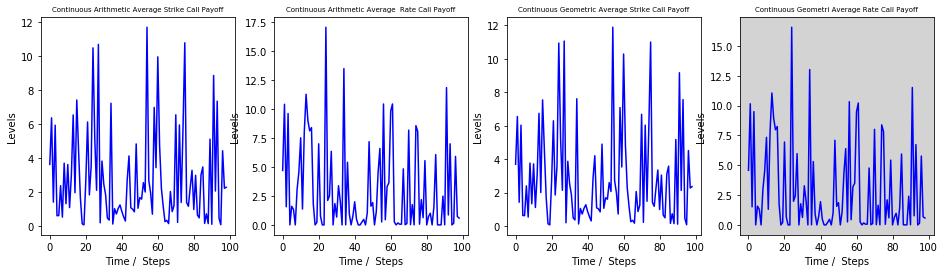

In [12]:
print("2.3 Asian Call Option  Continuos Graphs")  
fig, axs = plt.subplots(1,4, figsize=(16, 4), gridspec_kw={'width_ratios': [3, 3, 3, 3]})
plt.gca().set_facecolor('lightgray')
axs[0].plot(caascex, color = 'b')
axs[0].set_title('Continuous Arithmetic Average Strike Call Payoff', fontsize=7)
axs[1].plot(caarcex, color = 'b')
axs[1].set_title('Continuous Arithmetic Average  Rate Call Payoff', fontsize=7)
axs[2].plot(cgascex, color = 'b')
axs[2].set_title('Continuous Geometric Average Strike Call Payoff', fontsize=7)
axs[3].plot(cgarcex, color = 'b')
axs[3].set_title('Continuous Geometri Average Rate Call Payoff', fontsize=7)
for ax in axs:
    ax.set(xlabel='Time /  Steps', ylabel='Levels')
    plt.gca().set_facecolor('lightgray')
plt.show();
plt.close();
fig.tight_layout()


#### Asian Call Option Discrete payoffs

In [13]:
print("2.3 Asian Call Option Discrete Graphs")
daasc = option_payoff_mean(r, T, stock_price_path, daa_0)
print(f'Discrete Arithmetic Average Strike Call Value: {daasc:.4f}')
dgasc = option_payoff_mean(r, T, stock_price_path, dga_0)
print(f'Discrete Geometric Average Strike Call Value: {dgasc:.4f}')
daarc = option_payoff_mean(r, T, daa_0, strike_e)
print(f'Discrete Arithmetic Average Rate Call Value: {daarc:.4f}')
dgarc = option_payoff_mean(r, T, dga_0, strike_e)
print(f'Discrete Geometric Average Rate Call Value: {dgarc:.4f}')
daascex = option_payoff(r, T, stock_price_path, daa_0)
dgascex = option_payoff(r, T, stock_price_path, dga_0)
daarcex = option_payoff(r, T, daa_0, strike_e)
dgarcex = option_payoff(r, T, dga_0, strike_e)


2.3 Asian Call Option Discrete Graphs
Discrete Arithmetic Average Strike Call Value: 0.8432
Discrete Geometric Average Strike Call Value: 0.8554
Discrete Arithmetic Average Rate Call Value: 5.0584
Discrete Geometric Average Rate Call Value: 5.0445


#### Asian Call Option Discrete Graphs

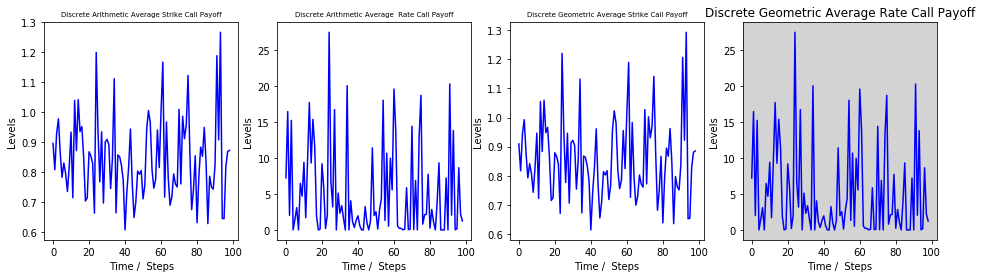

In [14]:
fig, axs = plt.subplots(1,4, figsize=(16, 4), gridspec_kw={'width_ratios': [3, 3, 3, 3]})
axs[0].plot(daascex, color = 'b')
axs[0].set_title('Discrete Arithmetic Average Strike Call Payoff', fontsize=7)
axs[1].plot(daarcex, color = 'b')
axs[1].set_title('Discrete Arithmetic Average  Rate Call Payoff', fontsize=7)
axs[2].plot(dgascex, color = 'b')
axs[2].set_title('Discrete Geometric Average Strike Call Payoff', fontsize=7)
axs[3].plot(dgarcex, color = 'b')
axs[3].set_title('Discrete Geometric Average Rate Call Payoff')
for ax in axs:
    ax.set(xlabel='Time /  Steps', ylabel='Levels')
    plt.gca().set_facecolor('lightgray')
plt.show();
plt.close();
fig.tight_layout()

### 2.4 Asian Put Option <a id="asian_put_option"></a>
   - [Asian options](#asian_options)
   - [Top](#table_contents) 
       
**Asian Put Option**: In an Asian put option, the holder has the right (but not the obligation) 
    to sell the underlying asset at a predetermined strike price. 
    The payout at expiration is determined by the difference between 
    the strike price and the average price of the underlying asset. 
    If this difference is positive, it represents a profit           

#### Asian Call Option Continuous payoffs     

In [15]:

print("2.4 Asian Put Option")
caasp = option_payoff_mean(r, T, caa_0, stock_price_path)
print(f'Continuous Arithmetic Average Strike Put Value: {caasp:.4f}')
caarp = option_payoff_mean(r, T, strike_e, caa_0)
print(f'Continuous Arithmetic Average Rate Put Value: {caarp:.4f}')
cgasp = option_payoff_mean(r, T, cga_0, stock_price_path)
print(f'Continuous Geometric Average Strike Put Value: {cgasp:.4f}')
cgarp = option_payoff_mean(r, T, strike_e, cga_0)
print(f'Continuous Geometric Average Rate Put Value: {cgarp:.4f}') 
caaspex = option_payoff(r, T, caa_0, stock_price_path)
cgaspex = option_payoff(r, T, cga_0, stock_price_path)
caarpex = option_payoff(r, T, strike_e, caa_0)
cgarpex = option_payoff(r, T, strike_e, cga_0)

2.4 Asian Put Option
Continuous Arithmetic Average Strike Put Value: 2.8258
Continuous Arithmetic Average Rate Put Value: 2.4041
Continuous Geometric Average Strike Put Value: 2.7482
Continuous Geometric Average Rate Put Value: 2.4741


### Asian Put Option Continuos Graphs

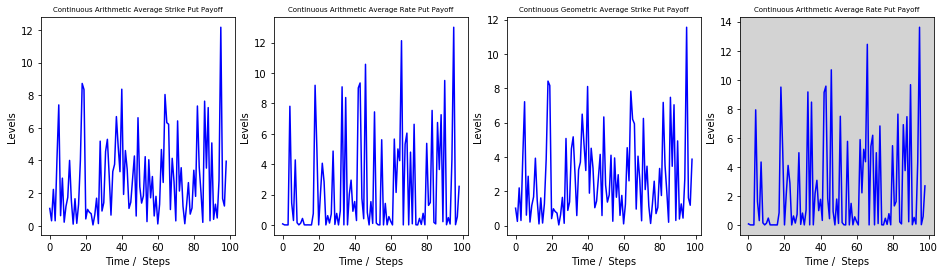

In [16]:
fig, axs = plt.subplots(1,4, figsize=(16, 4), gridspec_kw={'width_ratios': [3, 3, 3, 3]})
axs[0].plot(caaspex, color = 'b')
axs[0].set_title('Continuous Arithmetic Average Strike Put Payoff', fontsize=7)
axs[1].plot(caarpex, color = 'b')
axs[1].set_title('Continuous Arithmetic Average Rate Put Payoff', fontsize=7)
axs[2].plot(cgaspex, color = 'b')
axs[2].set_title('Continuous Geometric Average Strike Put Payoff', fontsize=7)
axs[3].plot(cgarpex, color = 'b')
axs[3].set_title('Continuous Arithmetic Average Rate Put Payoff', fontsize=7)
for ax in axs:
    ax.set(xlabel='Time /  Steps', ylabel='Levels')
    plt.gca().set_facecolor('lightgray')
plt.show();
plt.close();
fig.tight_layout()

#### Asian Call Option Discrete payoffs

In [17]:
print("2.4 Asian Put Option")
daasp = option_payoff_mean(r, T, daa_0, stock_price_path)
print(f'Discrete Arithmetic Average Strike Put Value: {daasp:.4f}')
daarp = option_payoff_mean(r, T, strike_e, daa_0)
print(f'Discrete Arithmetic Average Rate Put Value: {daarp:.4f}')
dgasp = option_payoff_mean(r, T, dga_0, stock_price_path)
print(f'Discrete Geometric Average Strike Put Value: {dgasp:.4f}')
dgarp = option_payoff_mean(r, T, strike_e, dga_0)
print(f'Discrete Geometric Average Rate Put Value: {dgarp:.4f}')
daaspex = option_payoff(r, T, daa_0, stock_price_path)
dgaspex = option_payoff(r, T, dga_0, stock_price_path)
daarpex =option_payoff(r, T, strike_e, daa_0)
dgarpex = option_payoff(r, T, strike_e, dga_0)

2.4 Asian Put Option
Discrete Arithmetic Average Strike Put Value: 0.8432
Discrete Arithmetic Average Rate Put Value: 4.4243
Discrete Geometric Average Strike Put Value: 0.8308
Discrete Geometric Average Rate Put Value: 4.4350


#### Asian Put Option Discrete Graph

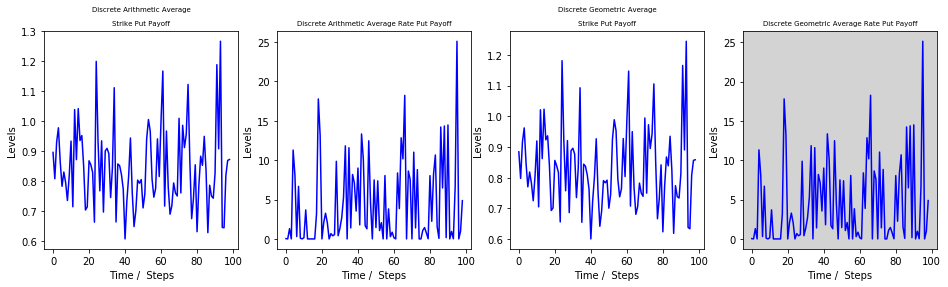

In [18]:
fig, axs = plt.subplots(1,4, figsize=(16, 4), gridspec_kw={'width_ratios': [3, 3, 3, 3]})
axs[0].plot(daaspex, color = 'b')
axs[0].set_title('Discrete Arithmetic Average\n\nStrike Put Payoff', fontsize=7)
axs[1].plot(daarpex, color = 'b')
axs[1].set_title('Discrete Arithmetic Average Rate Put Payoff', fontsize=7)
axs[2].plot(dgaspex, color = 'b')
axs[2].set_title('Discrete Geometric Average\n\nStrike Put Payoff', fontsize=7)
axs[3].plot(dgarpex, color = 'b')
axs[3].set_title('Discrete Geometric Average Rate Put Payoff', fontsize=7)
for ax in axs:
    ax.set(xlabel='Time /  Steps', ylabel='Levels')
    plt.gca().set_facecolor('lightgray')
plt.show();
plt.close();
fig.tight_layout()

#### Comparison Asian Call options averaging methods

In [19]:
print('Expected Asian Option Payoffs based on different methods of averaging:')
print("Strike Call")
print(tabulate([["Continuous Arithmetic Average Strike Call", caasc], 
                ["Continuous Geometric Average Strike Call", cgasc], 
                ["Discrete Arithmetic Average Strike Call", daasc], 
                ["Discrete Geometric Average Strike Call", dgasc]], 
                floatfmt=".2f", tablefmt="pretty_grid"))
print()
print()
print("Rate Call")
print(tabulate([["Continuous Arithmetic Average Rate Call", caarc], 
                ["Continuous Geometric Average Rate Call", cgarc], 
                ["Discrete Arithmetic Average Rate Call", daarc],
                ["Discrete Geometric Average Rate Call", dgarc]], 
                floatfmt=".2f", tablefmt="pretty_grid"))
print()
print()
print("Strike Put")
print(tabulate([["Continuous Arithmetic Average Strike Put", caasp], 
                ["Continuous Geometric Average Strike Put", cgasp], 
                ["Discrete Arithmetic Average Strike Put", daasp], 
                ["Discrete Geometric Average Strike Put", dgasp]], 
                floatfmt=".2f", tablefmt="pretty_grid"))
print()
print()
print("Rate Put")
print(tabulate([["Continuous Arithmetic Average Strike Put", caarp], 
                ["Continuous Geometric Average Strike Put", cgarp],
                ["Discrete Arithmetic AverageStrike Put ", daarp],
                ["Discrete Geometric Average Strike Put", dgarp]], 
                floatfmt=".2f", tablefmt="pretty_grid"))


Expected Asian Option Payoffs based on different methods of averaging:
Strike Call
-----------------------------------------  ----
Continuous Arithmetic Average Strike Call  2.81
Continuous Geometric Average Strike Call   2.88
Discrete Arithmetic Average Strike Call    0.84
Discrete Geometric Average Strike Call     0.86
-----------------------------------------  ----


Rate Call
---------------------------------------  ----
Continuous Arithmetic Average Rate Call  3.05
Continuous Geometric Average Rate Call   2.97
Discrete Arithmetic Average Rate Call    5.06
Discrete Geometric Average Rate Call     5.04
---------------------------------------  ----


Strike Put
----------------------------------------  ----
Continuous Arithmetic Average Strike Put  2.83
Continuous Geometric Average Strike Put   2.75
Discrete Arithmetic Average Strike Put    0.84
Discrete Geometric Average Strike Put     0.83
----------------------------------------  ----


Rate Put
-----------------------------------

### 3. Lookback Options <a id="lookback_options"></a>

   - [3.1 Lookback Options Definition](#lookback_option_definition)
   - [3.2 Lookback Options examples](#lookback_option_example)
   - [3.3 Lookback Call Option](#lookback_call_options)
   - [3.4 Lookback Put Option](#lookback_put_options)
   - [Euler Maruyama](#euler)
   - [Top](#table_contents)   

    
    
### 3.1 Lookback Options Definition <a id="lookback_options_definition"></a>

Lookback options derive its value by using the realized historical extremes (minimum or maximum) of the underlying asset's price 
to determine the payoff of the option. Therefore path dependency in the option is strong. The maximum can be sampled continuously or discretely.

**Lookback Call Option:** In a lookback call option, the holder has the right 
    to buy the underlying asset at the lowest price observed during the 
    option's lifespan. 

**Lookback Put Option:** In a lookback put option, the holder has the right
    to sell the underlying asset at the highest price observed during the option's 
    lifespan. 
    
    
Assuming $M$ the maximum of the stock price, the payoffs are given by:

- **Lookback rate call**
$$max(M - E, 0)$$

- **Lookback rate put**
$$max(E - M, 0)$$

- **Lookback strike call**
$$max(S - M, 0)$$

- **Lookback strike put**
$$max(M - S, 0)$$

where $S$ is the stock price and $E$ the strike.


The lookback period can be either fixed or floating:

- **Fixed Lookback Option:** The lookback period is predetermined and constant throughout the option's life.Replacing the asset with its realized maximum is called fixed strike lookback option.

- **Floating Lookback Option:** The lookback period is dynamic and adjusts over time, considering the entire option's life.Replacing the strike price $E$ with the realized maximum gives floating strike lookback option. 
 

**Numerical example of a fixed strike lookback call**. This option has the payoff: $$max(M-E, \,0)$$ where M is the realized maximum. It also has closed-form pricing formula. There are two forms of the closed-form formula for fixed strike lookback call. The form of the formula depends on whether the realized maximum $M$ is higher than the strike currently. 
    
$$ Se^{-D(T-t)}N(d_1)-Ee^{-r(T-t)}N(d_2) +Se^{-r(T-t)}\frac{\sigma^2}{2(r-D)}\times\left(-\left(\frac{S}{E}\right)^{-(2(r-D)/\sigma^2)}N\left(d_1-\frac{2(r-D)\sqrt{T-t}}{\sigma}\right) + e^{(r-D)(T-t)}N(d_1)\right) $$

$$d_1 = \frac{log(S/E)+(r-D+\frac{1}{2}\sigma^2)(T-t)}{\sigma\sqrt{T-t}}$$$$d_2 = d_1 - \sigma\sqrt{T-t}$$
</div>



- [Top](#table_contents)  

### 3.2 Lookback Options examples <a id="lookback_option_example"></a>
#### Lookback continuous

##### Defining continuous funciton 

In [20]:
def continuous_maximum_0(dictionary, dataframe):
    for col in dataframe.columns:
        vet = []
        for index in range(len(dataframe[col])):
            if index == 0:
                higher = dataframe[col][index]
            if higher < dataframe[col][index]:
                higher = dataframe[col][index] 
            else:
                higher = higher
            vet.append(higher)
        dictionary[col] = vet

    return dictionary

#### Lookback option continuous

Continuous


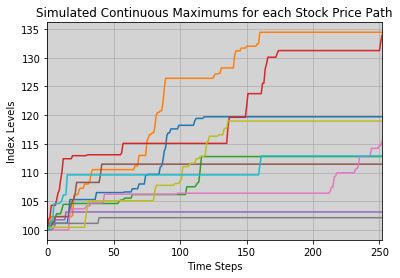

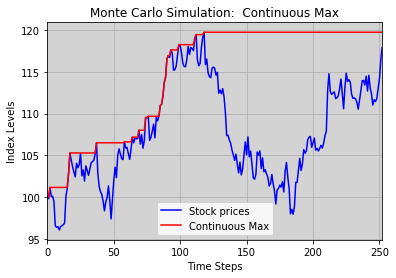

In [21]:
print("Continuous")
# Continuous Stock maximums
MaxC_0 = {}
MaxC_0 = continuous_maximum_0(MaxC_0, stock_price_path)
c_max_stock = pd.DataFrame(MaxC_0)

for index in range(0, 10, 1):
    plt.plot(c_max_stock[index])
    plt.grid(True)
    plt.xlabel('Time Steps')
    plt.xlim(0,252)
    plt.ylabel('Index Levels')
    plt.gca().set_facecolor('lightgray')
    plt.title('Simulated Continuous Maximums for each Stock Price Path');
plt.show();
plt.close();
    
    
# Plot example
plt.plot(stock_price_path[index_0], color = 'b', label = 'Stock prices')
plt.plot(c_max_stock[index_0], color = 'r', label = 'Continuous Max')
plt.grid(True)
plt.xlabel('Time Steps')
plt.xlim(0,252)
plt.ylabel('Index Levels')
plt.gca().set_facecolor('lightgray')
plt.title('Monte Carlo Simulation:  Continuous Max')
plt.legend()  
plt.show();   
plt.close();       

#### Lookback discrete option
##### Defining discrete funciton 

In [22]:
def discrete_maximum(dictionary, dataframe, periods):
    for col in dataframe.columns:
        vet = []
        higher = dataframe[col][0]
        for index in range(len(dataframe[col])):
            if index % periods == 0:
                if higher < dataframe[col][index]:
                    higher = dataframe[col][index] 
                else:
                    higher = higher
            vet.append(higher)
        dictionary[col] = vet
    return dictionary

#### Lookback discrete option

Discrete


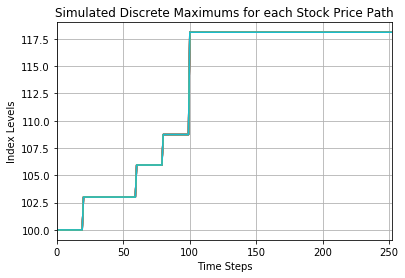

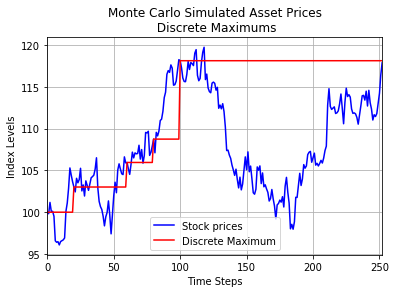

In [23]:
print("Discrete")
# Discrete Stock maximums
MD = {}
MD = discrete_maximum(MD, stock_price_path, discrete_period)
d_max_stock = pd.DataFrame(MD)

for index in range(0, 10, 1):
    plt.plot(d_max_stock[index_0])
    plt.grid(True)
    plt.xlabel('Time Steps')
    plt.xlim(0,252)
    plt.ylabel('Index Levels')
    plt.title('Simulated Discrete Maximums for each Stock Price Path');
plt.show();    
    
# Plot example
plt.plot(stock_price_path[index_0], color = 'b', label = 'Stock prices')
plt.plot(d_max_stock[index_0], color = 'r', label = 'Discrete Maximum')
plt.grid(True)
plt.xlabel('Time Steps')
plt.xlim(0,252)
plt.ylabel('Index Levels')
plt.title('Monte Carlo Simulated Asset Prices\n Discrete Maximums')
plt.legend()
plt.show();


### Lookback call Options <a id="lookback_call_option"></a>

In [24]:
print("Continuous")
clsc = option_payoff_mean(r, T, stock_price_path, c_max_stock)
print(f'Continuous Lookback Strike Call Value: {clsc:.2f}')
clrc = option_payoff_mean(r, T, c_max_stock, strike_e)
print(f'Continuous Lookback Rate Call Value: {clrc:.2f}')
clscex = option_payoff(r, T, stock_price_path, c_max_stock)
clrcex = option_payoff(r, T, c_max_stock, strike_e)
print("Discrete")
dlsc = option_payoff_mean(r, T, stock_price_path, d_max_stock)
print(f'Discrete Lookback Strike Call Value: {dlsc:.2f}')
dlrc = option_payoff_mean(r, T, d_max_stock, strike_e)
print(f'Discrete Lookback Rate Call Value: {dlrc:.2f}')
dlscex = option_payoff(r, T, stock_price_path, d_max_stock)
dlrcex = option_payoff(r, T, d_max_stock, strike_e)

Continuous
Continuous Lookback Strike Call Value: 0.00
Continuous Lookback Rate Call Value: 10.28
Discrete
Discrete Lookback Strike Call Value: 0.61
Discrete Lookback Rate Call Value: 7.48


#### Lookback call Options Graphs

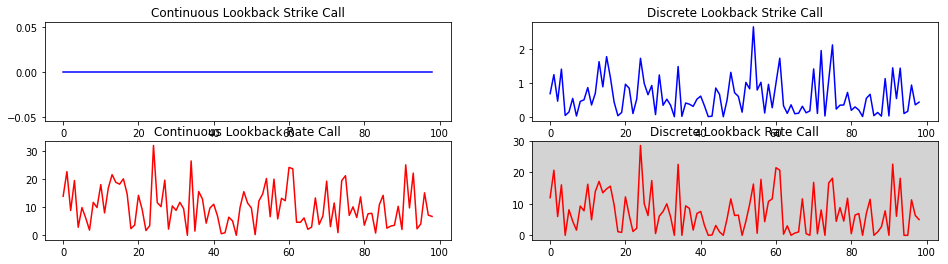

In [25]:
fig, axs = plt.subplots(2,2, figsize=(16, 4))
axs[0,0].plot(clscex, color = 'b')
axs[0,0].set_title('Continuous Lookback Strike Call')
axs[1,0].plot(clrcex, color = 'r')
axs[1,0].set_title('Continuous Lookback Rate Call')
axs[0,1].plot(dlscex, color = 'b')
axs[0,1].set_title('Discrete Lookback Strike Call')
axs[1,1].plot(dlrcex, color = 'r')
axs[1,1].set_title('Discrete Lookback Rate Call')
for ax in axs:
    plt.gca().set_facecolor('lightgray')
plt.show();
plt.close();
fig.tight_layout()

### Lookback put Options <a id="lookback_put_option"></a>

In [26]:
print("Continuos")
# Lookback Strike Put
clsp = option_payoff_mean(r, T, c_max_stock, stock_price_path)
print(f'Continuous Lookback Strike Put Value: {clsp:.2f}')
# Lookback Rate Put
clrp = option_payoff_mean(r, T, strike_e, c_max_stock)
print(f'Continuous Lookback Rate Put Value: {clrp:.2f}')
clspex =option_payoff(r, T, c_max_stock, stock_price_path)
clrpex = option_payoff(r, T, strike_e, c_max_stock)
print("Discrete")
dlsp = option_payoff_mean(r, T, d_max_stock, stock_price_path)
print(f'Discrete Lookback Strike Put Value: {dlsp:.2f}')
dlrp = option_payoff_mean(r, T, strike_e, d_max_stock)
print(f'Discrete Lookback Rate Put Value: {dlrp:.2f}')
dlspex = option_payoff(r, T, d_max_stock, stock_price_path)
dlrpex = option_payoff(r, T, strike_e, d_max_stock)

Continuos
Continuous Lookback Strike Put Value: 9.65
Continuous Lookback Rate Put Value: 0.00
Discrete
Discrete Lookback Strike Put Value: 7.45
Discrete Lookback Rate Put Value: 0.00


#### Lookback put Options Graphs

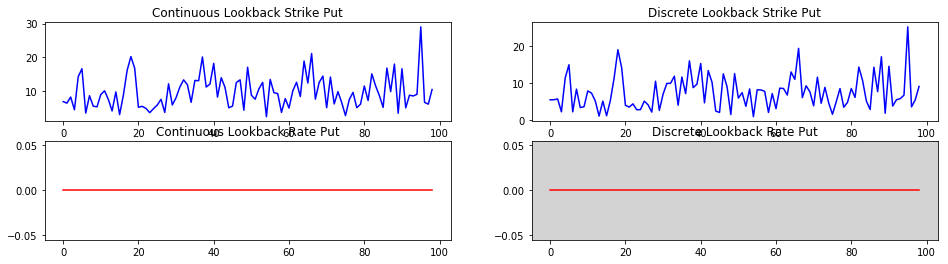

In [27]:
fig, axs = plt.subplots(2,2, figsize=(16, 4))
axs[0,0].plot(clspex, color = 'b')
axs[0,0].set_title('Continuous Lookback Strike Put')
axs[1,0].plot(clrpex, color = 'r')
axs[1,0].set_title('Continuous Lookback Rate Put')
axs[0,1].plot(dlspex, color = 'b')
axs[0,1].set_title('Discrete Lookback Strike Put')
axs[1,1].plot(dlrpex, color = 'r')
axs[1,1].set_title('Discrete Lookback Rate Put')
for ax in axs:
    plt.gca().set_facecolor('lightgray')
plt.show();
plt.close();
fig.tight_layout()

### Lookback Options: Comparison of Results

In [28]:
print("Compasrison")
print('Expected Lookback Option Payoffs based on different modes of taking maximums:')
print()
print("Strike Call")
print(tabulate([["Continuous Maximum Strike Call", clsc], 
                ["Discrete Maximum Strike Call", dlsc]], 
                floatfmt=".2f", tablefmt="pretty_grid"))
print()
print("Rate Call")
print(tabulate([["Continuous Maximum Rate Call", clrc], 
                ["Discrete Maximum Rate Call", dlrc]], 
                floatfmt=".2f", tablefmt="pretty_grid"))
print()
print("Strike Put")
print(tabulate([["Continuous Maximum Strike Put", clsp], 
                ["Discrete Maximum Strike Put", dlsp]], 
                floatfmt=".2f", tablefmt="pretty_grid"))
print()
print("Rate Put")
print(tabulate([["Continuous Maximum Rate Put", clrp], 
                ["Discrete Maximum Rate Put", dlrp]], 
                floatfmt=".2f", tablefmt="pretty_grid"))



Compasrison
Expected Lookback Option Payoffs based on different modes of taking maximums:

Strike Call
------------------------------  ----
Continuous Maximum Strike Call  0.00
Discrete Maximum Strike Call    0.61
------------------------------  ----

Rate Call
----------------------------  -----
Continuous Maximum Rate Call  10.28
Discrete Maximum Rate Call     7.48
----------------------------  -----

Strike Put
-----------------------------  ----
Continuous Maximum Strike Put  9.65
Discrete Maximum Strike Put    7.45
-----------------------------  ----

Rate Put
---------------------------  ----
Continuous Maximum Rate Put  0.00
Discrete Maximum Rate Put    0.00
---------------------------  ----


### 4. Euler Maruyama <a id="euler"></a>

   - [4.1 Euler-Maruyama Definition](#euler_definition)
   - [Top](#table_contents)   
   
   
### 4. Euler Maruyama Definition <a id="euler_definition"></a>


The **Euler Maruyama Method (EM)** is a numerical method used for pricing exotic derivatives options. 
The Euler Maruyama method is used as a technique for approximating solutions to stochastic differential equations (SDEs).
The Euler-Maruyama method handles the stochastic (random) component of the equation by adding a stochastic increment to the deterministic part at each time step (Drift). All in all, the Euler-Maruyama method essentially applies the Euler method to the deterministic part of the equation while adding randomness at each step to account for stochastic behavior.






**Advantages of the Euler-Maruyama (EM) Method:**

- *Computational Efficiency: It handles a large number of time steps, making it suitable for simulations with a high level of granularity.*

- *Numerical Stability: When properly implemented with small time steps, the Euler-Maruyama method can provide stable and accurate approximations for SDEs.*

**Limitations and Considerations:**

- *Order of Accuracy: The Euler-Maruyama method is a first-order numerical scheme, which means it may introduce some bias and may not be as accurate as higher-order methods for complex problems or when very high precision is required.*

- *Step Size Selection: Smaller time steps often lead to more accurate results but can be computationally expensive.*


**Euler-Maruyama method steps for solving a stochastic differential equation:**

- (1) **Initialization:** Starts with an initial set of values for the variables to simulate 
- (2) **Step size election (Discretization):** Divide the time interval of interest into small time steps.
- (3) **Iteration:** For each time step, calculate the deterministic change (based on the deterministic part of the equation) and add a stochastic increment (sampled from a random distribution with mean zero and variance proportional to Δt).
- (4) **Repeat:** Continue iterating over the time steps until you reach the desired endpoint.


**Numerical interpretaiion of the Euler-Maruyama (EM) Method:**

- (1) First, we start by simulating the potential price paths of the underlying asset. THis can be done by computational methods such as a Montecarlo Simulation. We use a geometric Brownian motion with a stochastic differential equation (SDE) where $S_t$ is the price of the underlying at time t, $\sigma$ is constant volatility, r is the constant risk-free interest rate and $X_t$ is the brownian motion.
 
$$ dS_t = rS_tdt + \sigma S_tdX_t$$

For some time horizon $dt$, $dX_t \sim \phi \sqrt{dt}$ where $\phi \sim N(0,1)$, so the SDE can be written as:
$$ dS_t = rS_tdt + \sigma S_t\phi \sqrt{dt}$$

Taking $\delta t$ as the time step, applying the discretization of SDE, the <strong>closed-form solution</strong> for simulating the underlying stock price is given as:</p>
$$ S_{i+1} = S_i\,exp^{(r-\frac{1}{2}\sigma^2)}\delta t + \sigma \phi \sqrt{\delta t}$$

and applying Euler discretization of SDE, the <strong>Euler-Maruyama scheme</strong> for the simulation is:
$$ S_{i+1} = S_i\,(1 + r\delta t + \sigma \phi \sqrt{\delta t})$$


- (2) Secondly, calculate the option payoff for each of these price paths.
- (3) Thirdly,  Average the payoff and discount back to today to determine the option price.


**Simulation explanation:** For this simulation we will use Asian options with geometric average Lookback otions with fixed strike. For each simulation to analyze the effect of a specific  variable to the option price, we will use different step sizes. 
The intial parameters are specified at the beggining. To simulate the stock price, we use the EM method as explained above. For each simulation group, we generate graphs. After getting the results, we find 2 interesting observations that are later discussed in [5.3 Convergence](#convergence) and [5.4 Antithetic ](#antithetic)

- [Top](#table_contents)  

#### Initial Simulation variables and defining functions

In [29]:
print("Initial simulation variables")
print("Definining the initial simulation variables:")
print(">> Stock price = "+str(S_o))
print(">> strike price = "+str(k))
print(">> time to expiration = "+str(T))
print(">> time to expiration = "+str(time_expiration))
print(">> volatility "+str(sigma))
print(">> risk free rate = "+str(r))
print(">> risk free rate = "+str(riskfree))
print("random seed number = "+str(random_seed_n))


# define simulation function
def EM_simulation_path(Stock_price_0, mu, vol, Time, number_of_sims):
    random.seed(random_seed_n)
    dt = 1/(days_year)
    t_steps = Time*(days_year)
    S_CF = zeros((t_steps, number_of_sims))
    S_CF[0] = Stock_price_0
    S_EM = zeros((t_steps, number_of_sims))
    S_EM[0] = Stock_price_0    
    for i in range(0, t_steps-1):
        sn = random.standard_normal(int(ceil(number_of_sims/2)))
        w = concatenate((sn,-sn), axis=0)
        S_CF[i+1] = S_CF[i] * exp(dt*(mu-0.5*vol**2) + vol*sqrt(dt)*w)
        S_EM[i+1] = S_EM[i] * (1 + mu*dt + vol*sqrt(dt)*w)
    return (S_CF, S_EM)


class numerical_pricer():
    def __init__ (self, spath, E, T, r):
        self.spath = spath
        self.E = E
        self.T = T
        self.r = r
        
    def asian(self):
        Avg = exp(mean(log(self.spath), axis=0))  # geometric average
        C = exp(-self.r*self.T) * mean(maximum(0, Avg-self.E))
        return round(C, 4)
    
    def asian_call(self):
        Avg = exp(mean(log(self.spath), axis=0))  # geometric average
        C = exp(-self.r*self.T) * mean(maximum(0, Avg-self.E))
        return round(C, 4)
    
    def asian_put(self):
        Avg = exp(mean(log(self.spath), axis=0))  # geometric average
        C = exp(-self.r*self.T) * mean(maximum(0, self.E-Avg))
        return round(C, 4)
    
    def lookback(self):
        value_max=0
        for i in range(self.spath.shape[1]):
            value_max += maximum(0, self.spath[:,i].max()-self.E)
        C = exp(-self.r*self.T) * value_max/self.spath.shape[1]
        return round(C, 4)
    
    
    def lookback_call(self):
        value_max=0
        for i in range(self.spath.shape[1]):
            value_max += maximum(0, self.spath[:,i].max()-self.E)
        C = exp(-self.r*self.T) * value_max/self.spath.shape[1]
        return round(C, 4)
    
    def lookback_put(self):
        value_max=0
        for i in range(self.spath.shape[1]):
            value_max += maximum(0, self.E - self.spath[:,i].max())
        C = exp(-self.r*self.T) * value_max/self.spath.shape[1]
        return round(C, 4)
    

Initial simulation variables
Definining the initial simulation variables:
>> Stock price = 100
>> strike price = 100
>> time to expiration = 1
>> time to expiration = 1
>> volatility 0.2
>> risk free rate = 0.05
>> risk free rate = 0.05
random seed number = 20230926


### 5. Simulation <a id="simulation"></a>

   - [5.1 Simulation](#simulation)
        - [5.1.1 Simulation Spot](#simulation_spot)
        - [5.1.2 Simulation Strike](#simulation_strike)
        - [5.1.3 Simulation Volatility](#simulation_volatility)
        - [5.1.4 Simulation Time to maturity](#simulation_time)
        - [5.1.5 Simulation Risk free rate](#simulation_rate)

   - [Top](#table_contents)   


By using the Euler Maruyama method, to simulate the underlying stock price, we analyze the effect of each variable in the price of the option. For the simulation, the exotic options used for the simulaiton are: **Asian option with geometric average** and a **Lookback option with fixed strike**. 

       
 - [Top](#table_contents)  

### Defining the Euler Maruyama simulation

In [30]:
def EM_simulation(S0, T, vol, r, n_sims):
    random.seed(random_seed_n)
    dt = 1/252
    t_steps = int(T*252)
    spaths = zeros((t_steps, n_sims))
    spaths[0] = S0    
    for i in range(0, t_steps-1):
        sn = random.standard_normal(int(ceil(n_sims/2)))
        w = concatenate((sn,-sn), axis=0)
        #print("Euler Maruyama drift")
        spaths[i+1] = spaths[i] * (1 + r*dt + vol*sqrt(dt)*w)
    return spaths

def Sensitivity(target, S0=100, E=100, T=1, vol=0.2, r=0.05):
    prices_asian = []
    prices_asian_call= []
    prices_asian_put = []
    prices_lookback = []
    prices_lookback_call = []
    prices_lookback_put = []
    df = pd.DataFrame()
    
    if target == 'S0':
        df["S0"] = S0
        df.set_index (["S0"], inplace=True)
        for s in S0:
            spaths = EM_simulation(s, r, vol, T, number_of_simulations)
            pricer = numerical_pricer(spaths, E, T, r)
            prices_asian.append(pricer.asian())
            prices_asian_call.append(pricer.asian_call())
            prices_asian_put.append(pricer.asian_put())
            prices_lookback.append(pricer.lookback())
            prices_lookback_call.append(pricer.lookback_call())
            prices_lookback_put.append(pricer.lookback_put())
        df["Asian_option"] = prices_asian
        df["Asian_call_option"] = prices_asian_call
        df["Asian_put_option"] = prices_asian_put
        df["Lookback_option"] = prices_lookback
        df["Lookback_call_option"] = prices_lookback_call
        df["Lookback_put_option"] = prices_lookback_put
        return df
    elif target == 'E':
        df["E"] = E
        df.set_index (["E"], inplace=True)
        spaths = EM_simulation(S0, r, vol, T, number_of_simulations)
        for strike in E:
            pricer = numerical_pricer(spaths, strike, T, r)
            prices_asian.append(pricer.asian())
            prices_asian_call.append(pricer.asian_call())
            prices_asian_put.append(pricer.asian_put())
            prices_lookback.append(pricer.lookback())
            prices_lookback_call.append(pricer.lookback_call())
            prices_lookback_put.append(pricer.lookback_put())
        df["Asian_option"] = prices_asian
        df["Asian_call_option"] = prices_asian_call
        df["Asian_put_option"] = prices_asian_put
        df["Lookback_option"] = prices_lookback
        df["Lookback_call_option"] = prices_lookback_call
        df["Lookback_put_option"] = prices_lookback_put
        return df
    elif target == 'T':
        df["T"] = T
        df.set_index (["T"], inplace=True)
        for expiry in T:
            spaths = EM_simulation(S0, r, vol, expiry, number_of_simulations)
            pricer = numerical_pricer(spaths, E, expiry, r)
            prices_asian.append(pricer.asian())
            prices_asian_call.append(pricer.asian_call())
            prices_asian_put.append(pricer.asian_put())
            prices_lookback.append(pricer.lookback())
            prices_lookback_call.append(pricer.lookback_call())
            prices_lookback_put.append(pricer.lookback_put())
        df["Asian_option"] = prices_asian
        df["Asian_call_option"] = prices_asian_call
        df["Asian_put_option"] = prices_asian_put
        df["Lookback_option"] = prices_lookback
        df["Lookback_call_option"] = prices_lookback_call
        df["Lookback_put_option"] = prices_lookback_put
        return df
    elif target == 'vol':
        df["vol"] = vol
        df.set_index (["vol"], inplace=True)
        for sigma in vol:
            spaths = EM_simulation(S0, r, sigma, T, number_of_simulations)
            pricer = numerical_pricer(spaths, E, T, r)
            prices_asian.append(pricer.asian())
            prices_asian_call.append(pricer.asian_call())
            prices_asian_put.append(pricer.asian_put())
            prices_lookback.append(pricer.lookback())
            prices_lookback_call.append(pricer.lookback_call())
            prices_lookback_put.append(pricer.lookback_put())
        df["Asian_option"] = prices_asian
        df["Asian_call_option"] = prices_asian_call
        df["Asian_put_option"] = prices_asian_put
        df["Lookback_option"] = prices_lookback
        df["Lookback_call_option"] = prices_lookback_call
        df["Lookback_put_option"] = prices_lookback_put
        return df
    elif target == 'r':
        df["r"] = r
        df.set_index (["r"], inplace=True)
        for rate in r:
            spaths = EM_simulation(S0, rate, vol, T, number_of_simulations)
            pricer = numerical_pricer(spaths, E, T, rate)
            prices_asian.append(pricer.asian())
            prices_asian_call.append(pricer.asian_call())
            prices_asian_put.append(pricer.asian_put())
            prices_lookback.append(pricer.lookback())
            prices_lookback_call.append(pricer.lookback_call())
            prices_lookback_put.append(pricer.lookback_put())
        df["Asian_option"] = prices_asian
        df["Asian_call_option"] = prices_asian_call
        df["Asian_put_option"] = prices_asian_put
        df["Lookback_option"] = prices_lookback
        df["Lookback_call_option"] = prices_lookback_call
        df["Lookback_put_option"] = prices_lookback_put
        return df
    else:
        print("")
        return False
    
#print("Create Graph") 
def draw_plots(target, df):
    if target == "S0":
        variable = "Stock Price S0"
    elif target == "E":
        variable = "Strike Price E"
    elif target == 'T':
        variable = "Time to Expiry (T-t)"
    elif target == 'vol':
        variable = "Volatility Sigma σ"
    elif target == 'r':
        variable = "Risk-Free Rate"
    else:
        print("")
        return
    print("Simulation of Asian Call Option")      
    plt.plot(df['Asian_call_option'], color = 'r', label = 'Asian Call Option')
    plt.grid(True)
    plt.xlabel('Simulation')
    plt.ylabel('Simulation Effect')
    plt.gca().set_facecolor('lightgray')
    plt.title('Simulation Asian Call Option '+str(variable))
    plt.legend()  
    plt.show();   
    plt.close(); 
    
    print("Simulation of Asian Put Option")      
    plt.plot(df['Asian_put_option'], color = 'r', label = 'Asian Put Option')
    plt.grid(True)
    plt.xlabel('Simulation')
    plt.ylabel('Simulation Effect')
    plt.gca().set_facecolor('lightgray')
    plt.title('Simulation Asian Put Option '+str(variable))
    plt.legend()  
    plt.show();   
    plt.close(); 
    
    
    print("Simulation of Lookback Call Option")   
    plt.plot(df['Lookback_call_option'], color = 'g', label = 'Lookback Call Option')
    plt.grid(True)
    plt.xlabel('Simulation')
    plt.ylabel('Simulation Effect')
    plt.gca().set_facecolor('lightgray')
    plt.title('Simulation Lookback Call Option '+str(variable))
    plt.legend()  
    plt.show();   
    plt.close(); 
    
    print("Simulation of Lookback Put Option")   
    plt.plot(df['Lookback_put_option'], color = 'g', label = 'Lookback Put Option')
    plt.grid(True)
    plt.xlabel('Simulation')
    plt.ylabel('Simulation Effect')
    plt.gca().set_facecolor('lightgray')
    plt.title('Simulation Lookback Put Option '+str(variable))
    plt.legend()  
    plt.show();   
    plt.close(); 
        
    print("Scatterplot Comparison")       
    # Plot example
    plt.plot(df['Asian_call_option'], color = 'r', label = 'Asian Call Option')
    plt.plot(df['Asian_put_option'], color = 'blue', label = 'Asian Put Option')
    plt.plot(df['Lookback_call_option'], color = 'g', label = 'Lookback Call Option')
    plt.plot(df['Lookback_put_option'], color = 'yellow', label = 'Lookback Put Option')
    plt.grid(True)
    plt.xlabel('Simulation')
    plt.ylabel('Simulation Effect')
    plt.gca().set_facecolor('lightgray')
    plt.title('Simulation Comparison')
    plt.legend()  
    plt.show();   
    plt.close();       
   

### 5.1.1 Simulation Spot Price <a id="simulation_spot"></a>
   - [5.1 Simulation](#simulation)
   - [Top](#table_contents)  

In this simulation, I analyze the influence of the stock price today (t0) on the value of the Asian and Lookback options
The exercise is done in steps of size 5. 

**Observations:**
- **Observation 1:** Both Asian and Lookback call options have a value close 0 when the price of the stock S is below the strike price E. Therefore there is no value in executing the option. 
- **Observation 2:** Both Asian and Lookback put options have a value of 0 when the price of the stock S surpasses the strike price E. 
- **Observation 3:** Both Asian and Lookback call options' value increases linearly with the increase of the stock price S today and reaches  0  value when the stock price S is above the strike price E. There is no limit to the value of the Asian and lookback options as the price of the stock increases.
- **Observation 4:** Both Asian and Lookback put options' value decreases linearly with the increase of the stock price S today until it surpasses the strike price E and it remains zero. There is a limit to the value of both  Asian and lookback option puts
- **Observation 5:** the stock price value direction has a similar effect (direction) for both Asian and Lookback options.


Simulation Spot Price
Simulation of Asian Call Option


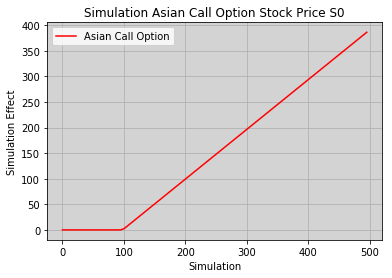

Simulation of Asian Put Option


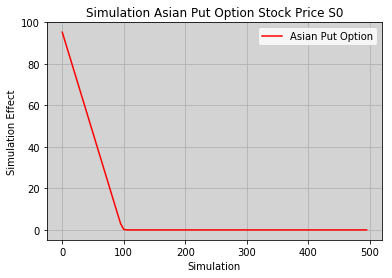

Simulation of Lookback Call Option


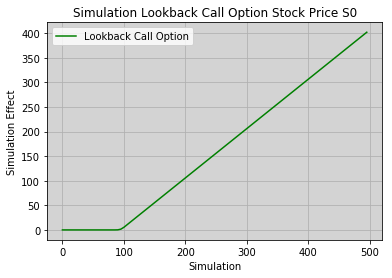

Simulation of Lookback Put Option


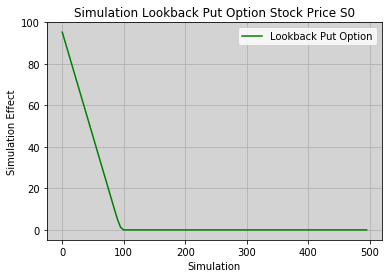

Scatterplot Comparison


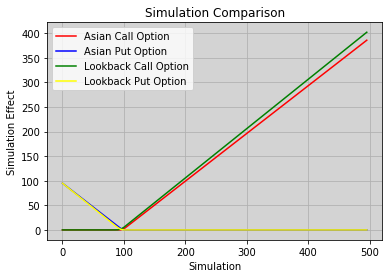

In [31]:
print("Simulation Spot Price")
S = list(range(0,500, 5))
Sensitivity_S0 = Sensitivity(target='S0', S0=S)
draw_plots(target='S0', df=Sensitivity_S0)

### 5.1.2 Simulation Strike Price <a id="simulation_strike"></a>
   - [5.1 Simulation](#simulation)
   - [Top](#table_contents)  
       
In this simulation, I analyze the influence of the strike price of the option on the value of the Asian and Lookback options
The exercise is done in steps of size 5. 

**Observations:**
- **Observation 6:** Both Asian and Lookback call options have a value close to 0 when the strike price E of the option is higher than the stock price S. Therefore there is no value in executing the option. 
- **Observation 7:** Both Asian and Lookback put options have a value of 0 when the strike price E of the option is lower than the stock price S.
- **Observation 8:** Both Asian and Lookback call options' value decreases linearly with the increase of the strike price E of the option. This is because the distance  between the stock price today S and the strike price E increases and the option becomes more out of the money
- **Observation 9:** Both Asian and Lookback put options' value increases linearly with the increase of the strike price of the option. This is because the distance  between the stock price today S and the strike price E increases and the option becomes more out of the money
- **Observation 10:** The effect of stock price S and the strike price E on the option price has similar direction for both Asian and Lookback options.


Simulation of Asian Call Option


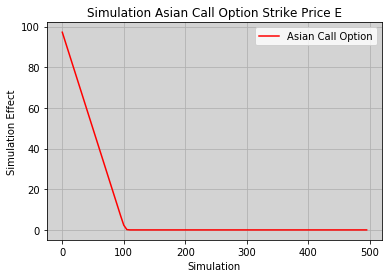

Simulation of Asian Put Option


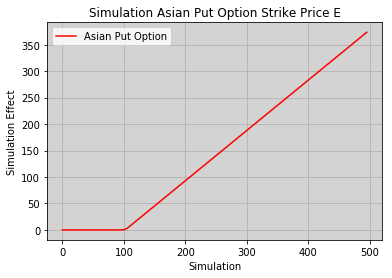

Simulation of Lookback Call Option


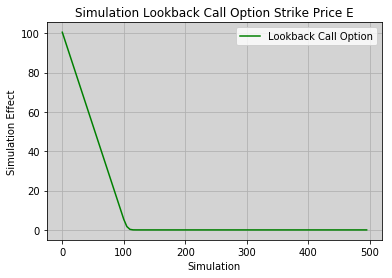

Simulation of Lookback Put Option


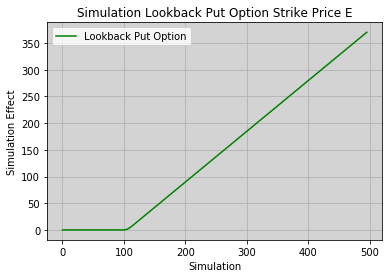

Scatterplot Comparison


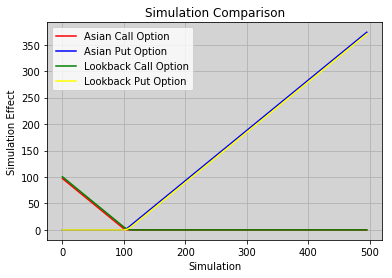

In [32]:
Es = list(range(0,500, 5))
Sensitivity_E = Sensitivity(target='E', E=Es)
draw_plots(target='E', df=Sensitivity_E)

### 5.1.3 SimulAtion Time to expiry  <a id="simulation_time"></a>
   - [5.1 Simulation](#simulation)
   - [Top](#table_contents)  

In this simulation, I analyze the influence of the time to expiry on the value of the Asian and Lookback options
The T-t time to expiry simulation varies in 1 month step. 
    
**Observations:**
- **Observation 11:**For Asian and lookback call options, the value monotonically increases as time to expiry increases. But the change speed seems to be slower and slower, resulting in a curve which becomes flatter as time to expiry becomes longer. When the time to expiry becomes larger, the effect of discounting becomes more important. 
- **Observation 12:** For an Asian call option, the  positive effects in the option’s value of time peaks approximately around the month 25 and then the effect starts to become marginally negative.
- **Observation 13:* For an Asian put option, the effect is negative. As time to expiration increases, there is a higher probability that reaches in the money. since the bigger the time horizon to expiry, the most likely the stock price can reach the strike price in the future eventually. Therefore as higher the time to expiration, the lower  the Asian put option price. 
- **Observation 14:** For an Lookback call option, the  effects is positive and it takes more months for it to becomes flatter. 
- **Observation 15:**  This effect is flat for the Lookback put option given the initial parameters (strike chosen) 


Simulation of Asian Call Option


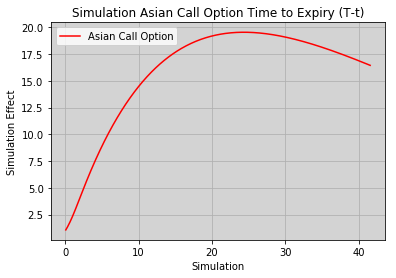

Simulation of Asian Put Option


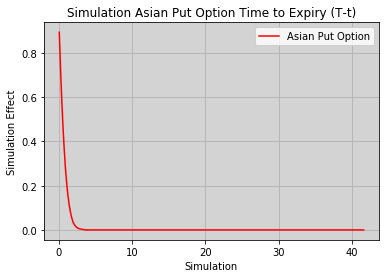

Simulation of Lookback Call Option


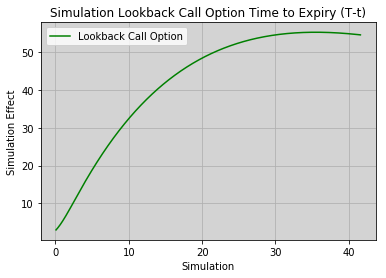

Simulation of Lookback Put Option


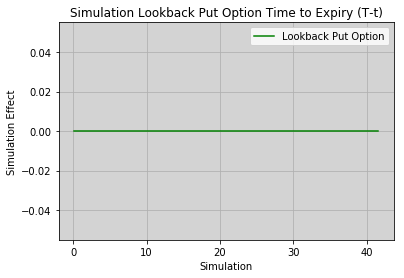

Scatterplot Comparison


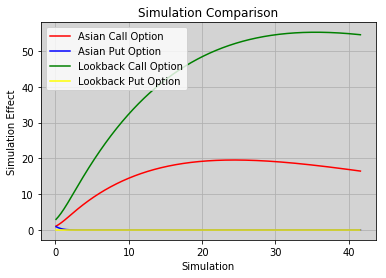

In [33]:
Ts = [T/12 for T in list(range(1,500,1))]
Sensitivity_T = Sensitivity(target='T', T=Ts)
draw_plots(target='T', df=Sensitivity_T)

### 5.1.4 Simulation to Volatility  <a id="simulation_volatility"></a>
   - [5.1 Simulation](#simulation)
   - [Top](#table_contents)  
       
 
In this simulation, I analyze the influence of the volatility on the value of the Asian and Lookback options
The exercise is done in steps of size 1% and it goes from 1% to 100%. 

**Observations:**
- **Observation 16:** Both Asian and Lookback call options value increase as the volatility increases. This is because given the volatility, the stock price S is most likely to move either side (on a bigger size) rather than staying at its current level, which therefore increases the chance of being in the money. The curve is almost linear. 
- **Observation 17 :** For the lookback call  option, the effect of an increase in volatility is higher than in the case of both Asian options.
- **Observation 18:**  This effect is flat for the Lookback put option given the initial parameters (strike chosen) 


Simulation of Asian Call Option


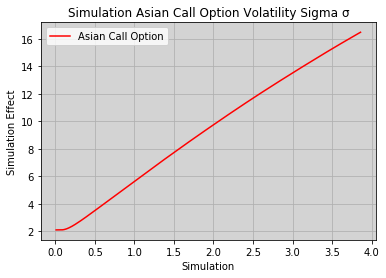

Simulation of Asian Put Option


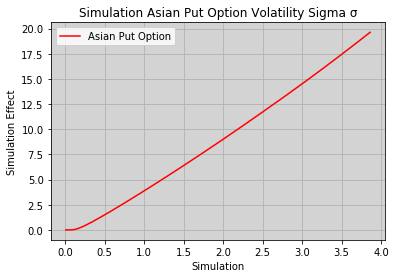

Simulation of Lookback Call Option


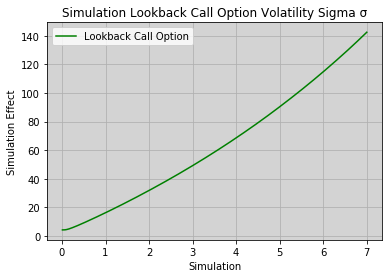

Simulation of Lookback Put Option


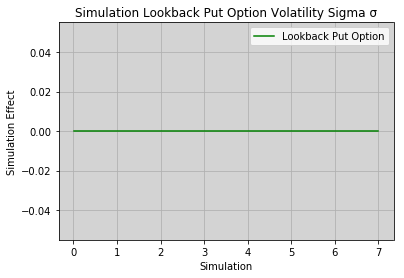

Scatterplot Comparison


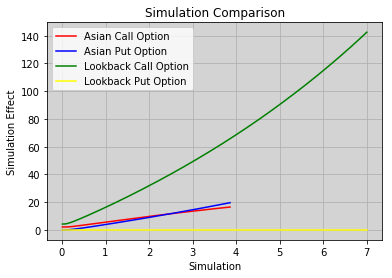

In [34]:
vols = [vol/100 for vol in list(range(1,701,1))]
Sensitivity_vol = Sensitivity(target='vol', vol=vols)
draw_plots(target='vol', df=Sensitivity_vol)

### 5.1.5 Simulation to Risk Free  <a id="simulation_riskfree"></a>
   - [5.1 Simulation](#simulation)
   - [Top](#table_contents)  
       
       
In this simulation, I analyze the influence of the risk free rate in the value of the Asian and Lookback options

**Observations:**
- **Observation 19 :**In the case of the Asian call option, the effect of the risk free rate is positive at the beginning, then the effect becomes marginal until it reaches a peak and the effect tunrs negative. After around 150% approximately, the value of the option starts to decrease as the risk free rate increases further. 
- **Observation 20 :** In the case of the Asian put  option, this shift happens earlier and faster until the value of the option reaches 0. 
- **Observation 21 :** In the case of the Lookback call option, the effect is positive and smoother. As the risk free rate increases the present value of the stock decreases (discounting effect).  
- **Observation 22:** This effect is flat for the Lookback put option given the initial parameters (strike chosen)


risk free rate simulation
Simulation of Asian Call Option


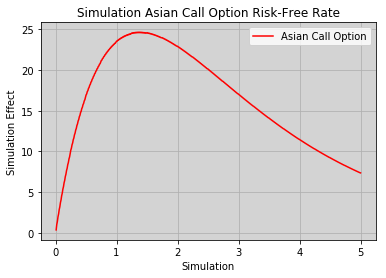

Simulation of Asian Put Option


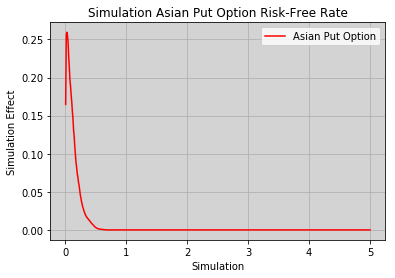

Simulation of Lookback Call Option


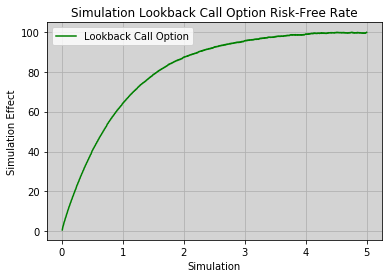

Simulation of Lookback Put Option


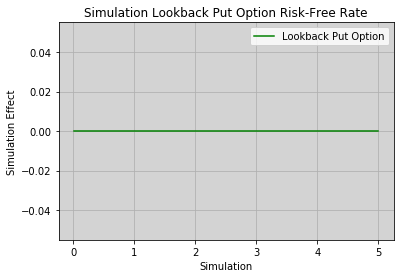

Scatterplot Comparison


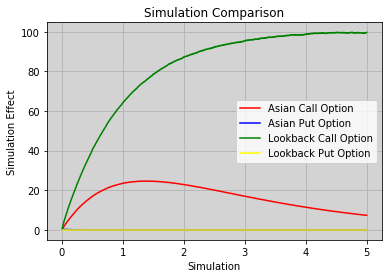

In [35]:
print("risk free rate simulation")
rs = [r/100 for r in list(range(1,501,1))]
Sensitivity_r = Sensitivity(target='r', r=rs)
draw_plots(target='r', df=Sensitivity_r)

###  5.2 Analysis and interesting observations <a id="analysis"></a>
- [Top](#table_contents) 


- The impact of the stock price S and the strike price E on both Asian and Lookback options are similar (in terms of direction). 
- Both Asian and Lookback call options value increases as the stock price S increases (more near in the money) and it decreases when the stock price S decreases (more far from  in the money). Both Asian and Lookback put  options value increases as the stock price S decreases increases (more near in the money) and it decreases when the stock price S increases(more far from  in the money).
- Both Asian and Lookback call options value decreases as the strike price E increases (more far from  in the money) and it increases when the strike price E decreases (more near in the money). Both Asian and Lookback put  options value increases as the strike price E  increases (more near in the money).  and it decreases when the strike price E decreases (more far from  in the money.
- Regarding time to expiry, for Asian and lookback call options, the value monotonically increases as time to expiry increases. But the change speed seems to be slower and slower, resulting in a curve which becomes flatter as time to expiry becomes longer. - Regarding the risk free rate, the effect on the Asian put option shifts faster and it make the price of the option got to zero, way faster than in the case of the Asia call option. 
- Volatility effect for both Asian call and put options is positive  given the fact that the higher the volatility, the most likely the stock price can be in the money and therefore the option can be executed .

- After seeing the results of the simulation, we face the following challenges: does the size of the step for each simulation impacts the accuracy of the results?   Can we improve the accuracy in a Monte Carlo simulation ? Those topics are discussed in the next sections: 5.3 Convergence and 5.4 Antithetic


### 5.3 Convergence <a id="convergence"></a>
- [Top](#table_contents)  
**Interesting observation:** Given the computational time constraints, the calibration of the steps size becomes a time cost versus benefit decision.  How much would the size of the step size impact the accuracy of the resutls?  Therefore a challenge is determining the optimum step size. We want to know the accurate and reliable are the numerical methods for solving SDEs.

To answer these question , will be important to discuss the concept of **Convergence**. The concept of convergence formalizes what it means for one stochastic process to get closer to another as the discrete time steps Δt are reduced.

- The convergence of stochastic differential equations (SDE)  approximations refers to the behaviour of numerical methods used to approximate the solutions of SDEs as the discretization step size (Δt) approaches zero. 

- **Convergence in Probability**: Does the numerical solution approaches the true solution of the SDE in some probabilistic sense as Δt gets smaller? **Convergence in probability means that, as Δt approaches zero, the approximate solution becomes increasingly likely to be close to the true solution.**

- As a result, the convergence analysis of SDE approximations is helpful to understand the reliability of numerical methods, choose appropriate discretization schemes, and assess the impact of the step size on the accuracy of simulation results. 


**Exercise:** We will carry a simulation in order to the Convergences of SDEs using Euler Maruyama methods
 
We establish first the stochastic differential equations parameters for the simulation. For this Montecarlo simulation exercise we will use 1000 simulations. We setup the data frame and create the vectors in which the errors will be saved
To start the simulation we create Brownian  Montecarlo paths. Then we simulate the stochastic prices using Euler- Maruyama method. After, we compute the strong error and the mean of those errors.
**Finally we graph the results in which we can  see that the bigger  the step size the larger the error, and vice versa, the smaller the step size the  smaller the errors. The strong and weak error terms decrease with Δt, which means that both approximations are strongly and weakly convergent.**

Convergence of SDEs
Ploting the results


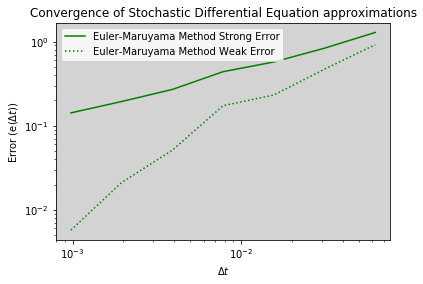

In [36]:
print("Convergence of SDEs")
#parameters
mu=2
sigma=1
X0 = 1
str_err_em = []
weak_err_em = []
dt_grid = [2 ** (Ra-10) for Ra in range(7)]
mc = 1000

for Dt in dt_grid:  
    t = np.arange(Dt, 1 + Dt, Dt)
    n = len(t)    
    err_em = np.zeros(n)
    Y_sum, Xem_sum = np.zeros(n), np.zeros(n)  
    for i in range(mc):        
        np.random.seed(i)
        dB = np.sqrt(Dt) * np.random.randn(n)
        B  = np.cumsum(dB)  
        Y = X0 * np.exp((mu - 0.5*sigma**2)*t + sigma * B)     
        Xemt, Xem = X0, []
        for j in range(n):
            Xemt += mu*Xemt* Dt + sigma * Xemt * dB[j]
            Xem.append(Xemt)
        err_em  += abs(Y - Xem)     
        Y_sum += Y
        Xem_sum += Xem
    str_err_em.append(max(err_em / mc))    
    weak_err_em.append(max(abs(Y_sum - Xem_sum)/mc))
    
print("Ploting the results")
plt.loglog(dt_grid, str_err_em, label="Euler-Maruyama Method Strong Error",color='green')
plt.loglog(dt_grid, weak_err_em, label="Euler-Maruyama Method Weak Error",color='green',ls=':')
plt.gca().set_facecolor('lightgray')
plt.legend()
plt.title('Convergence of Stochastic Differential Equation approximations')
plt.xlabel('$\Delta t$'); plt.ylabel('Error (e($\Delta t$))'); plt.legend(loc=2);
plt.show()
plt.close();

### 5.4 Antithetic Variables Sampling<a id="antithetic"></a>
- [Top](#table_contents)  

**Interesting observation:** Can we reduce the variance of the error and get more accurate numbers by increasing the  number of Montecarlo simulations. 

The key characteristic of the Monte Carlo simulation is the generation of random numbers (normal distribution). Since we  need to get higher accuracy number, is necessary to  get more random numbers in order to approach a normal distribution. 
As a result is necessary to use a methodology to reduce the variance such as antithetic variates


** Exercise: Monte Carlo Simulation with Antithetic Variables:**
The antithetic variates method is a variance reduction technique used in Monte Carlo methods. Considering
that the error in the simulated signal (using Monte Carlo methods) has a one-over square root
convergence, it is necessary to generate a larger number of sample paths in order to obtain more accurate result. 
As a result the antithetic variates method reduces the variance of the simulation results.

In antithetic variates, the variance is reduced by introducing negative dependence between pairs of random draws while in moment matching (for it to approximate a normal distribution). We make a comparison of the results for an Asian Call option with Euler Maruyama method. **In the graph we can visualize in red that the Antithetic method reaches results with lower standard errors.**


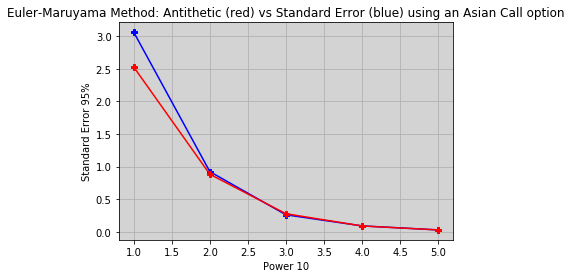

In [37]:
def normfit(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), si.sem(a)
    h = se * si.t.ppf((1 + confidence) / 2., n - 1)
    var = np.var(data, ddof=1) # Divide by n-1 
    sigma = np.sqrt(var)
    return m, sigma, np.hstack((m-h,m+h))

def simulate_path(s0,E,mu,sigma,horizon,timesteps,n_sims,sim_method='Closed Form',option='Asian',COP='Call'):
    random.seed(random_seed_n)
    S0 = s0 
    K = E
    r = mu
    T = horizon
    t = timesteps
    n = n_sims
    dt = T/t
    S = zeros((t,n))
    S[0] = S0
    for i in range(0, t-1):
        w = random.standard_normal(n)          
        if sim_method == 'Euler-Maruyama':
            S[i+1] = S[i] * (1 + r*dt + sigma*sqrt(dt)*w)
    if option == 'Asian':
        average = S.mean(axis = 0)    
        if COP == 'Call':
            payout = exp(-r*T) * maximum(0, average - K)
        else:
            payout = exp(-r*T) * maximum(0, K - average)     
    price, SigPrice, CI = normfit(payout)   
    std_error = (CI[1]-CI[0])/price
    return S, price, std_error

def simulate_path_av(s0,E,mu,sigma,horizon,timesteps,n_sims,sim_method='Closed Form',option='Asian',COP='Call'):
    random.seed(random_seed_n)
    S0 = s0          
    K = E          
    r = mu              
    T = horizon       
    t = timesteps  
    n = n_sims 
    n_av = int(n/2)
    dt = T/t
    Su = zeros((t,n_av))
    Sd = zeros((t,n_av))
    Su[0] = S0
    Sd[0] = S0

    for i in range(0, t-1):
        w = random.standard_normal(n_av)
        if sim_method == 'Euler-Maruyama':
            Su[i+1] = Su[i] * (1 + r*dt + sigma*sqrt(dt)*w)
            Sd[i+1] = Sd[i] * (1 + r*dt + sigma*sqrt(dt)*(-w))           
    S = np.hstack((Su,Sd))       
    if option == 'Asian':
        average = S.mean(axis = 0)    
        if COP == 'Call':
            payout = exp(-r*T) * maximum(0, average - K)
        else:
            payout = exp(-r*T) * maximum(0, K - average)
        
    price, SigPrice, CI = normfit(payout)   
    std_error = (CI[1]-CI[0])/price
    return S, price, std_error

option = 'Asian'
COP = 'Call'
sim_method = 'Euler-Maruyama'
stderror_list = []
stderror_list_av = []
sim_times = [10**1, 10**2, 10**3, 10**4, 10**5]
nn = [1, 2, 3, 4, 5]
for i in sim_times:
    sim_error    = simulate_path(S0,K,r,sigma,T,Nsteps,i,sim_method,option,COP)[2]
    sim_error_av = simulate_path_av(S0,K,r,sigma,T,Nsteps,i,sim_method,option,COP)[2]
    stderror_list.append(sim_error)
    stderror_list_av.append(sim_error_av)
stderror_df = pd.DataFrame(stderror_list)
stderror_av_df = pd.DataFrame(stderror_list_av)
stderror_sample = pd.concat((stderror_df,stderror_av_df), axis=1)
stderror_sample.columns = ['Standard', 'Antithetic Variables']
stderror_sample.index = nn
plt.plot(stderror_sample['Standard'], color = 'b', marker='P',label = 'Standard')
plt.plot(stderror_sample['Antithetic Variables'], color = 'r', marker='x', label = 'Antithetic')
plt.grid(True)
plt.xlabel('Power 10')
plt.ylabel('Standard Error 95%')
plt.title('Euler-Maruyama Method: Antithetic (red) vs Standard Error (blue) using an Asian Call option')
plt.gca().set_facecolor('lightgray')
plt.show();
plt.close();

### Conclusion <a id="conclusion"></a>

- Euler Maruyama numerical method is computationally efficient and can make accurate approximations for SDEs, however, it cannot reach the accuracy levels of higher orders methods for complex problems and its accuracy depends on the size of the steps. 

- Monte Carlo  process  simulation is a useful tool to perform  exotic option pricing. However, the accuracy of the simulations is constrained by the granularity of the time steps and the numbers of simulations 

- In the simulation we discovered several relationships between the  variables and the option price:

- The impact of the stock price S and the strike price E on both Asian and Lookback options are similar (in terms of direction). 

- Regarding time to expiry, for Asian and lookback call options, the value monotonically increases as time to expiry increases. - But the change speed seems to be slower and slower, resulting in a curve which becomes flatter as time to expiry becomes longer. 

- Regarding the risk free rate, the effect on the Asian put option shifts faster and it make the price of the option got to zero, way faster than in the case of the Asia call option. 

- Time to expiry and risk-free interest rate have similar effects for the same effect Asian and lookback options

- Volatility effect for both Asian call and put options is positive  given the fact that the higher the volatility, increases the chances that the option can be executed .


   - [Top](#table_contents)   

### References <a id="references"></a>

- Bouzoubaa, M.; Osseiran A. **"Exotic Options and Hybrids: A Guide to Structuring, Pricing and Trading"**
- Zhang, P. **"Exotic Options:A Guide to Second Generation Options"**
- Das, S. **"Structured Products Volume 1: Exotic Options; Interest Rates and Currency"**
- Healy, J. **""Applied Quantitative Finance for Equity Derivatives"**
- Kat, H. **"Structured Equity Derivatives: The Definitive Guide to Exotic Options and Structured Notes. Wiley (2001)"**
- Overhaus, M.; Bermudez, A. ***"Equity Hybrid Derivatives. Wiley (2007) "***
- Fadugba, S., Adegboyegun, B.,**"On the convergence of euler maruyama method and milstein scheme for the solution of stochastic differential equations"** International Journal of Applied Mathematics and Modeling
- CQF Program. **"Paul Wilmott on Quantitative Finance"** New York: John Wiley & Sons, Ltd., 2006.
- CQF Program. ***Module 3. Lecture 4 Introduction to Numerical Methodss***
- CQF Program. ***Module 3. Lecture 5 Exotic Options***
- CQF Program. ***Module 3. Lecture 6 Understanding Volatility***
- CQF Program. ***Python Lab: 5 Black Scholes Option Pricing***
- CQF Program. ***Python Lab: 6 Monte Carlo Simulation***
- CQF Program. ***Python Lab: 7 Finite Difference Methods***

- [Top](#table_contents)   